In [1263]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Note: The following do not work with Python 3.12
#import sweetviz as sv
#import shap
#from ydata_profiling import ProfileReport


seed = 2024  #seed = 2024: train model as stated in example_crisp_dm_pipeline.ipynb
np.random.seed(seed)

# Pre Data Cleaning: Readin data and preprocessing individual table

##### Recipes

In [1264]:
df_recipes = pd.read_csv('data/recipes.csv')

# Consolidated Non-Vegetarian Keywords
non_vegetarian_keywords = list(set([
    'flounder', 'lobsters', 'lump', 'rack', 'shank', 'steak', 'scallops', 'alligator', 
    'livers', 'roe', 'ham', 'turkey', 'chicken', 'duck', 'bacon', 'tuna', 'swordfish', 
    'lobster', 'meatballs', 'salmon', 'sweetbreads', 'breasts', 'chicken-flavored', 
    'ducklings', 'drumstick', 'liver', 'shanks', 'rabbit', 'poultry', 'herring', 
    'mussels', 'clams', 'squid', 'pork', 'veal', 'haddock', 'chorizo', 'chihuahua', 
    'eel', 'stuffing', 'cod', 'gelatin', 'sausage', 'curd', 'thighs', 'lox', 'cabbage', 
    'wonton', 'bone', 'giblets', 'pheasant', 'quail', 'shrimp', 'fish', 'sole', 
    'gizzard', 'Canadian', 'pesto', 'truffles', 'anchovies', 'venison', 'pheasants', 
    'tenderloin', 'meats', 'tripe', 'breast', 'wings', 'ribs', 'sausages', 'trout', 
    'oysters', 'octopus', 'crab', 'prawns', 'catfish', 'sardines', 'mahi', 'halibut', 
    'bass', 'perch', 'tilapia', 'grouper'
]))

# Consolidated Non-Vegan Keywords
non_vegan_keywords = list(set([
    'milk', 'cheese', 'butter', 'egg', 'honey', 'mozzarella-cheddar', 'cream', 'whip', 
    'jarlsberg', 'fontina', 'ham', 'cheesecake', 'hollandaise', 'caviar', 'creamRegular', 
    'custard', 'yogurt', 'gouda', 'margarine', 'beef', 'salmon', 'sour', 'bisquick', 
    'carton', 'cotija', 'creme', 'buttercream', 'buttermilk', 'ricotta', 'cottage', 
    'eggs', 'mayonnaise', 'eggshells', 'lactose-free', 'skim', 'ghee', 'mascarpone', 
    'alfredo', 'whey', 'casein', 'lactose', 'albumin', 'bechamel', 'sour cream', 
    'cream cheese', 'feta', 'gorgonzola', 'parmesan', 'mozzarella', 'cheddar', 'brie', 
    'camembert', 'roquefort', 'stilton', 'blue cheese', 'colby', 'monterey jack', 
    'swiss cheese', 'provolone', 'edam', 'havarti', 'pecorino', 'asiago', 'emmental', 
    'gruyere', 'halloumi', 'manchego', 'paneer', 'queso fresco', 'ricotta salata', 
    'romano', 'taleggio', 'vacherin', 'milk chocolate', 'whey protein', 'casein protein', 
    'egg noodles', 'egg whites', 'egg yolks', 'hollandaise sauce', 'aioli', 'flan', 
    'quiche', 'meringue', 'pavlova', 'egg wash', 'frittata', 'omelette', 'scrambled eggs', 
    'poached eggs', 'hard-boiled eggs', 'deviled eggs', 'eggnog', 'brioche', 'challah', 
    'pound cake', 'sponge cake', 'angel food cake', 'ladyfingers', 'mousse', 'souffle', 
    'creme brulee', 'panna cotta', 'tiramisu', 'yorkshire pudding', 'beef broth', 
    'chicken broth', 'fish sauce', 'oyster sauce', 'worcestershire sauce', 'caesar dressing', 
    'carbonara sauce', 'béarnaise sauce', 'gravlax', 'smoked salmon', 'caviar', 'anchovy paste', 
    'fish stock'
]))


# Function to check if a RecipeIngredientParts is vegetarian
def is_vegetarian(ingredient):
    for keyword in non_vegetarian_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Function to check if a RecipeIngredientParts is vegan
def is_vegan(ingredient):
    for keyword in non_vegan_keywords:
        if keyword in ingredient.lower():
            return False
    return True

# Apply the is_vegetarian function to the RecipeIngredientParts column
df_recipes['is_vegetarian'] = df_recipes['RecipeIngredientParts'].apply(is_vegetarian)

# Apply the is_vegan function to the RecipeIngredientParts column
df_recipes['is_vegan'] = df_recipes['RecipeIngredientParts'].apply(is_vegan)

# Map the diet category based on the is_vegetarian and is_vegan columns
df_recipes['diet_category'] = df_recipes.apply(lambda row: 'Vegetarian' if row['is_vegetarian'] else 'Vegan' if row['is_vegan'] else 'Omnivore', axis=1)

# create TotalTime_Recipe column
df_recipes['TotalTime_Recipe'] = df_recipes['CookTime'] + df_recipes['PrepTime']

# drop columns
df_recipes = df_recipes.drop(columns=['Name', 'CookTime', 'PrepTime', 'RecipeIngredientParts', 'RecipeIngredientQuantities', 'RecipeYield', 'is_vegetarian', 'is_vegan'])
# dtype conversion
df_recipes["RecipeCategory"] = df_recipes["RecipeCategory"].astype("category")
df_recipes["diet_category"] = df_recipes["diet_category"].astype("category")
# rename columns
df_recipes = df_recipes.rename(columns={"diet_category": "recipe_diet_category"})

df_recipes.info()
df_recipes.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75604 entries, 0 to 75603
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   RecipeId              75604 non-null  int64   
 1   RecipeCategory        75604 non-null  category
 2   Calories              75604 non-null  float64 
 3   FatContent            75604 non-null  float64 
 4   SaturatedFatContent   75604 non-null  float64 
 5   CholesterolContent    75604 non-null  float64 
 6   SodiumContent         75604 non-null  float64 
 7   CarbohydrateContent   75604 non-null  float64 
 8   FiberContent          75604 non-null  float64 
 9   SugarContent          75604 non-null  float64 
 10  ProteinContent        75604 non-null  float64 
 11  RecipeServings        48891 non-null  float64 
 12  recipe_diet_category  75604 non-null  category
 13  TotalTime_Recipe      75604 non-null  int64   
dtypes: category(2), float64(10), int64(2)
memory usage: 7.

,RecipeId,RecipeCategory,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,recipe_diet_category,TotalTime_Recipe
0,73440,Other,241.3,10.1,1.2,0.0,13.1,31.8,2.3,1.4,6.7,9.0,Vegetarian,1800
1,365718,Other,370.8,17.5,7.2,22.9,553.3,44.3,1.6,2.2,9.4,8.0,Omnivore,4200
2,141757,Other,377.6,20.9,10.5,45.7,1501.8,36.6,3.8,6.1,12.9,8.0,Vegetarian,6300
3,280351,Other,282.8,16.5,10.3,50.5,630.2,22.8,2.3,2.7,11.7,6.0,Omnivore,19800
4,180505,Other,257.5,8.6,2.4,110.7,160.9,39.8,0.4,30.2,6.3,6.0,Vegan,5400


##### Diet

In [1265]:
df_diet = pd.read_csv('data/diet.csv')

# chcek for missing values in the data
print(df_diet.isnull().sum())

# replace missing value in Diet with "Omnivore"
print(df_diet["Diet"].unique())
df_diet["Diet"] = df_diet["Diet"].fillna("Omnivore")

# check again
print(df_diet.isnull().sum())

# Change data type of Diet to category
df_diet["Diet"] = df_diet["Diet"].astype("category")

# rename the column Diet to diet_category
df_diet = df_diet.rename(columns={"Diet": "user_diet_category"})

df_diet.info()
df_diet.head()


AuthorId    0
Diet        1
Age         0
dtype: int64
['Vegetarian' 'Vegan' 'Omnivore' nan]
AuthorId    0
Diet        0
Age         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271907 entries, 0 to 271906
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   AuthorId            271907 non-null  object  
 1   user_diet_category  271907 non-null  category
 2   Age                 271907 non-null  int64   
dtypes: category(1), int64(1), object(1)
memory usage: 4.4+ MB


,AuthorId,user_diet_category,Age
0,10000120E,Vegetarian,46
1,1000014D,Vegan,18
2,1000015A,Vegetarian,58
3,1000016E,Vegetarian,32
4,1000027E,Vegan,61


##### Request

In [1266]:
df_requests = pd.read_csv('data/requests.csv')

# check for missing values
print(df_requests.isnull().sum())

#dtype
df_requests['HighCalories'] = df_requests['HighCalories'].astype('boolean')

df_requests['HighProtein'] = df_requests['HighProtein'].replace({'Indifferent': False, 'Yes': True})
df_requests['HighProtein'] = df_requests['HighProtein'].astype('boolean')

df_requests['LowFat'] = df_requests['LowFat'].astype('boolean')

df_requests['LowSugar'] = df_requests['LowSugar'].replace({'Indifferent': False, '0': True})
df_requests['LowSugar'] = df_requests['LowSugar'].astype('boolean')

df_requests['HighFiber'] = df_requests['HighFiber'].astype('boolean')

# rename columns
df_requests.rename(columns={'Time': 'TotalTime_Requested'}, inplace=True)
df_requests.rename(columns={'HighCalories': 'HighCalories_Requested'}, inplace=True)
df_requests.rename(columns={'HighProtein': 'HighProtein_Requested'}, inplace=True)
df_requests.rename(columns={'LowFat': 'LowFat_Requested'}, inplace=True)
df_requests.rename(columns={'LowSugar': 'LowSugar_Requested'}, inplace=True)
df_requests.rename(columns={'HighFiber': 'HighFiber_Requested'}, inplace=True)

df_requests.info() 
df_requests.head()


AuthorId        0
RecipeId        0
Time            0
HighCalories    0
HighProtein     0
LowFat          0
LowSugar        0
HighFiber       0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 8 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   AuthorId                140195 non-null  object 
 1   RecipeId                140195 non-null  int64  
 2   TotalTime_Requested     140195 non-null  float64
 3   HighCalories_Requested  140195 non-null  boolean
 4   HighProtein_Requested   140195 non-null  boolean
 5   LowFat_Requested        140195 non-null  boolean
 6   LowSugar_Requested      140195 non-null  boolean
 7   HighFiber_Requested     140195 non-null  boolean
dtypes: boolean(5), float64(1), int64(1), object(1)
memory usage: 4.5+ MB


,AuthorId,RecipeId,TotalTime_Requested,HighCalories_Requested,HighProtein_Requested,LowFat_Requested,LowSugar_Requested,HighFiber_Requested
0,2001012259B,73440,1799.950949,False,False,False,True,False
1,437641B,365718,4201.820980,False,True,False,False,True
2,1803340263D,141757,6299.861496,False,False,True,False,False
3,854048B,280351,19801.365796,False,True,True,True,True
4,2277685E,180505,5400.093457,False,False,False,True,False


##### Review

In [1267]:
df_reviews = pd.read_csv('data/reviews.csv')

#sns.countplot(data=df_reviews, x='Rating')  # Rating is only 2 except 2 rows -> drop Rating column
df_reviews = df_reviews.drop('Rating', axis=1)

# check for missing values
# print(df_reviews.isnull().sum())

# dtype 
df_reviews['Like'] = df_reviews['Like'].astype('boolean')

df_reviews.info()
df_reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   AuthorId   140195 non-null  object 
 1   RecipeId   140195 non-null  int64  
 2   Like       97381 non-null   boolean
 3   TestSetId  42814 non-null   float64
dtypes: boolean(1), float64(1), int64(1), object(1)
memory usage: 3.5+ MB


/var/folders/zq/34s415f93837022tv_1wj9kh0000gn/T/ipykernel_13842/4131158636.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('data/reviews.csv')


,AuthorId,RecipeId,Like,TestSetId
0,2492191A,33671,<NA>,1.0
1,2002019979A,92647,<NA>,2.0
2,408594E,161770,<NA>,3.0
3,2001625557E,108231,<NA>,4.0
4,2001427116E,71109,<NA>,5.0


# Data aggregation (Merge the tables)

In [1268]:
# keep all request, add info about custormers diet when exit -> df_diet right_join df_requests
merged_df_diet_request = df_diet.merge(df_requests, on='AuthorId', how='right')
#merged_df_diet_request.head(100)

# request without matched recipe, or recipe without request is useless  -> normal join 
merged_df_diet_request_recipes = merged_df_diet_request.merge(df_recipes, on='RecipeId')
#merged_df_diet_request_recipes.tail(100)

# review without request,recipes is useless -> left 
merged_df_diet_request_recipes_reviews = merged_df_diet_request_recipes.merge(df_reviews, on=['RecipeId', 'AuthorId'], how='left')
#merged_df_diet_request_recipes_reviews.info()

merged_df = merged_df_diet_request_recipes_reviews

# Post Data Cleaning (after merged) 

In [1269]:
# https://ishanjainoffical.medium.com/choosing-the-right-correlation-pearson-vs-spearman-vs-kendalls-tau-02dc7d7dd01d
def plot_corr(df, title, is_like=True):
    if 'Like' in df:
        df = df[df['Like'] == 1]
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(25, 7))
    nutrients_corr = df.corr(method='kendall') 
    mask = np.triu(np.ones_like(nutrients_corr, dtype=bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(nutrients_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax1, center=0)
    ax1.set_title(title + ' - kendall', fontsize=16)
    nutrients_corr = df.corr(method='pearson')
    mask = np.triu(np.ones_like(nutrients_corr, dtype=bool))
    cmap = sns.color_palette("coolwarm", as_cmap=True)
    sns.heatmap(nutrients_corr, mask=mask, cmap=cmap, annot=True, fmt=".2f", ax=ax2, center=0)
    ax2.set_title(title + ' - pearson', fontsize=16)
    plt.show()

In [1270]:
# # Filter 5% outliers for each recipes nutrient
# df_nutrients = merged_df[['Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent',
#                           'HighCalories_Requested', 'HighProtein_Requested', 'LowFat_Requested', 'LowSugar_Requested', 'HighFiber_Requested', 'Like']]

# threshold_map = {}
# for col in df_nutrients.columns:
#     if col in ['HighCalories_Requested', 'HighProtein_Requested', 'LowFat_Requested', 'LowSugar_Requested', 'HighFiber_Requested', 'Like']:
#         continue
#     for i in range(10000):
#         threshold = i
#         percent = (df_nutrients[df_nutrients[col] > threshold][col].count() / df_nutrients[col].count())*100
#         if percent <= 5:
#             threshold_map[col] = threshold
#             break
# print(threshold_map)

# merged_df = merged_df[merged_df['Calories'] < threshold_map['Calories']]
# merged_df = merged_df[merged_df['FatContent'] < threshold_map['FatContent']]
# merged_df = merged_df[merged_df['SaturatedFatContent'] < threshold_map['SaturatedFatContent']]
# merged_df = merged_df[merged_df['CholesterolContent'] < threshold_map['CholesterolContent']]
# merged_df = merged_df[merged_df['SodiumContent'] < threshold_map['SodiumContent']]
# merged_df = merged_df[merged_df['CarbohydrateContent'] < threshold_map['CarbohydrateContent']]
# merged_df = merged_df[merged_df['FiberContent'] < threshold_map['FiberContent']]
# merged_df = merged_df[merged_df['SugarContent'] < threshold_map['SugarContent']]
# merged_df = merged_df[merged_df['ProteinContent'] < threshold_map['ProteinContent']]

In [1271]:
# -> Drop unimportant columns 
merged_df = merged_df.drop(columns=['AuthorId', 'RecipeId', 'TotalTime_Requested', 'TotalTime_Recipe', 'RecipeServings', 'RecipeCategory', 'SaturatedFatContent', 'CholesterolContent', 'FiberContent', 'SugarContent', 'LowSugar_Requested', 'HighFiber_Requested', 'CarbohydrateContent'])
# One-Hot_encoding for categorical columns
merged_df = pd.get_dummies(merged_df, columns=['user_diet_category', 'recipe_diet_category'])

In [1272]:
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140195 entries, 0 to 140194
Data columns (total 16 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Age                              140195 non-null  int64  
 1   HighCalories_Requested           140195 non-null  boolean
 2   HighProtein_Requested            140195 non-null  boolean
 3   LowFat_Requested                 140195 non-null  boolean
 4   Calories                         140195 non-null  float64
 5   FatContent                       140195 non-null  float64
 6   SodiumContent                    140195 non-null  float64
 7   ProteinContent                   140195 non-null  float64
 8   Like                             97381 non-null   boolean
 9   TestSetId                        42814 non-null   float64
 10  user_diet_category_Omnivore      140195 non-null  bool   
 11  user_diet_category_Vegan         140195 non-null  bool   
 12  us

,Age,HighCalories_Requested,HighProtein_Requested,LowFat_Requested,Calories,FatContent,SodiumContent,ProteinContent,Like,TestSetId,user_diet_category_Omnivore,user_diet_category_Vegan,user_diet_category_Vegetarian,recipe_diet_category_Omnivore,recipe_diet_category_Vegan,recipe_diet_category_Vegetarian
0,46,False,False,False,241.3,10.1,13.1,6.7,False,NaN,False,False,True,False,False,True
1,35,True,True,True,241.3,10.1,13.1,6.7,False,NaN,False,False,True,False,False,True
2,22,True,False,False,241.3,10.1,13.1,6.7,False,NaN,False,False,True,False,False,True
3,70,True,True,True,241.3,10.1,13.1,6.7,False,NaN,False,True,False,False,False,True
4,63,False,True,True,241.3,10.1,13.1,6.7,False,NaN,False,True,False,False,False,True


# Data Spliting : Test - Train - Val 

<span style="color:red">

- randomly split with shuffle=True  (Note: remember the random_state number to be able to reproduce the split) 
- k-cross validation? 

</span>

42814


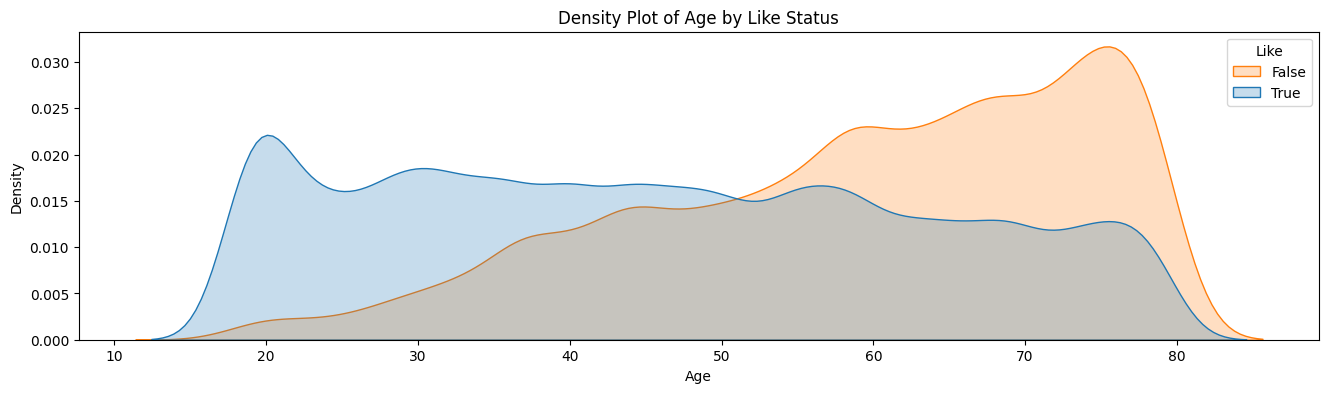

remove  Age                                535
HighCalories_Requested             535
HighProtein_Requested              535
LowFat_Requested                   535
Calories                           535
FatContent                         535
SodiumContent                      535
ProteinContent                     535
Like                               535
user_diet_category_Omnivore        535
user_diet_category_Vegan           535
user_diet_category_Vegetarian      535
recipe_diet_category_Omnivore      535
recipe_diet_category_Vegan         535
recipe_diet_category_Vegetarian    535
dtype: int64 duplicate rows
<class 'pandas.core.frame.DataFrame'>
Index: 26682 entries, 133716 to 30204
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              26682 non-null  int64  
 1   HighCalories_Requested           26682 non-null  boolean
 2   HighProtein_Reque

In [1273]:
from sklearn.model_selection import train_test_split

# TrainVal vs. Test split
test_dataframe = merged_df[merged_df['TestSetId'].notna()]
# how many rows in test_dataframe
print(test_dataframe.shape[0])

# Train vs. Val split
train_val_dataframe = merged_df[merged_df['TestSetId'].isna()]

# Prepare train val for training 
train_val_dataframe = merged_df[merged_df['Like'].notna()]
train_val_dataframe = train_val_dataframe.drop('TestSetId', axis=1)

# Create the KDE plot
plt.figure(figsize=(16, 4))  # Set the size of the plot as needed
sns.kdeplot(data=train_val_dataframe, x='Age', hue='Like', common_norm=False, fill=True)

# Enhancing the plot
plt.title('Density Plot of Age by Like Status')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Like', labels=['False', 'True'])
plt.show()

# find duplicated rows in the dataframe and drop
print("remove ", train_val_dataframe[train_val_dataframe.duplicated()].count(), "duplicate rows")
train_val_dataframe = train_val_dataframe.drop_duplicates()

# put Target (Like column) at the end 
like_column = train_val_dataframe.pop('Like')
train_val_dataframe['Like'] = like_column
train_val_dataframe['Like'] = train_val_dataframe['Like'].astype(int)
#train_val_dataframe.head(100)

# Drop 70% of the rows where 'Like' is 0
train_val_dataframe = train_val_dataframe.drop(
    train_val_dataframe[train_val_dataframe['Like'] == 0].sample(frac=0.80, random_state=seed).index
)


# drop 70% of all data in train_val_dataframe
# train_val_dataframe = train_val_dataframe.drop(train_val_dataframe.sample(frac=0.5).index)

# count 0 in train_val_dataframe
train_val_dataframe['Like'].value_counts()



X_train, X_val, y_train, y_val = \
  train_test_split(train_val_dataframe.iloc[:, :-1], train_val_dataframe.iloc[:, -1:],
                   test_size=0.1, 
                   shuffle=True,
                   random_state=3)

X_train.info()
#X_val.head()
#y_train.info()
#y_val.head()

print('Train:')
print(y_train['Like'].value_counts())
print('Val:')
print(y_val['Like'].value_counts())

# Training

Änderung: 
Bei meta_parameter_grid wurde hinzugefügt:
- parameter_grid_gaussianNB
- parameter_grid_linearSVC

In [1274]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import LinearSVC, SVC
# from sklearn.decomposition import PCA

# # Model initialization
# model_logistic_regression = LogisticRegression(max_iter=100)
# model_random_forest = RandomForestClassifier()
# model_gradient_boosting = GradientBoostingClassifier()
# model_gaussianNB = GaussianNB()
# model_linearSVC = LinearSVC(max_iter=10000)
# model_SVC = SVC()

# # Data scaling and PCA
# transform_scaler = StandardScaler()
# transform_pca = PCA()

# # Pipeline setup with PCA
# pipeline = Pipeline([
#     ("scaler", transform_scaler),
#     ("pca", transform_pca),
#     ("model", None)
# ])

# # Update your parameter grids to include PCA options
# # For example, for the Random Forest parameter grid:
# parameter_grid_random_forest = {
#     "pca__n_components": [None],  # None for no PCA, and some other options
#     "model": [model_random_forest],
#     "model__n_estimators": [40, 50, 60, 70],
#     "model__max_depth": [10, 15, 17],
# }

# # Hyperparameters for grid search
# parameter_grid_gaussianNB = {
#     "model": [model_gaussianNB],
#     "model__var_smoothing": [1e-9, 1e-8, 1e-7]
# }

# parameter_grid_SVC = {
#     "model": [model_SVC],
#     "model__C": [1, 10],  # Regularization parameter
#     "model__kernel": ['linear'],  # Start with linear kernel
#     # Uncomment the next line if you want to test the 'rbf' kernel
#     # "model__gamma": [0.1, 1]  # Kernel coefficient for 'rbf'
# }


# parameter_grid_logistic_regression = {
#     "model": [model_logistic_regression],
#     "model__C": [0.1, 1, 10]  # Inverse regularization strength
# }

# parameter_grid_gradient_boosting = {
#     "model": [model_gradient_boosting],
#     "model__n_estimators": [20, 30, 40]
# }

# # Combining all parameter grids
# meta_parameter_grid = [
#     parameter_grid_logistic_regression,
#     parameter_grid_random_forest,
#     parameter_grid_gradient_boosting,
#     parameter_grid_gaussianNB,
#     # parameter_grid_SVC
# ]

# # GridSearchCV setup
# search = GridSearchCV(
#     pipeline,
#     meta_parameter_grid, 
#     scoring="balanced_accuracy",
#     n_jobs=-1, 
#     cv=5,  # Number of folds for cross-validation
#     error_score="raise"
# )

# # Training and grid search
# # Replace X_train and y_train with your actual data
# search.fit(X_train, y_train.values.ravel())

# # Uncomment below to print the best parameters
# print("Best parameters:", search.best_params_, "(CV score=%0.3f)" % search.best_score_)

In [1275]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

def train_model(X_train, y_train):
    """
    Trains a classifier using a pipeline with data scaling, PCA, and RandomizedSearchCV.
    
    Parameters:
    - X_train (array-like): The training data.
    - y_train (array-like): The target labels.
    
    Returns:
    - search (RandomizedSearchCV): The trained RandomizedSearchCV object.
    """
    
    # Data scaling and PCA
    transform_scaler = StandardScaler()
    transform_pca = PCA()

    # Pipeline setup with PCA and a placeholder for the model
    pipeline = Pipeline([
        ("scaler", transform_scaler),
        ("pca", transform_pca),
        ("model", None)  # Placeholder for the model
    ])

    # Parameter grid for Random Forest
    parameter_grid_random_forest = {
        "model": [RandomForestClassifier()],
        "pca__n_components": [None, 5],
        "model__n_estimators": [50, 100, 150],
        "model__max_depth": [10, 15, 20, None]
    }

    # Parameter grid for Gradient Boosting
    parameter_grid_gradient_boosting = {
        "model": [GradientBoostingClassifier()],
        "pca__n_components": [None, 5],
        "model__n_estimators": [10, 20, 30],
        "model__max_depth": [3, 5, 7]
    }

    # Combine parameter grids
    combined_parameter_grid = [parameter_grid_random_forest, parameter_grid_gradient_boosting]

    # RandomizedSearchCV setup
    search = RandomizedSearchCV(
        pipeline,
        combined_parameter_grid,  
        scoring="balanced_accuracy",
        n_jobs=-1, 
        cv=5,
        random_state=42
    )

    # Training and random search
    search.fit(X_train, y_train.values.ravel())

    return search

search = train_model(X_train, y_train)
print("Best parameters:", search.best_params_, "(CV score=%0.3f)" % search.best_score_)

Best parameters: {'pca__n_components': None, 'model__n_estimators': 100, 'model__max_depth': 15, 'model': RandomForestClassifier(max_depth=15)} (CV score=0.787)


# Evaluation

In [1276]:
# evaluate performance of model on test set
print("Score on test set:", search.score(X_val, y_val.values.ravel()))

# prediction and show contingency table
ct = pd.crosstab(search.best_estimator_.predict(X_val), y_val.values.ravel(),
                 rownames=["pred"], colnames=["true"])
print(ct)

Score on test set: 0.8026352345574843
true     0    1
pred           
0     1408  260
1      319  978


In [1277]:
# (optional, if you're curious) for a detailed look on the performance of the different models
def get_search_score_overview():
  for c,s in zip(search.cv_results_["params"],search.cv_results_["mean_test_score"]):
      print(c, s)

print(get_search_score_overview())

{'pca__n_components': 5, 'model__n_estimators': 10, 'model__max_depth': 3, 'model': GradientBoostingClassifier()} 0.693646183643071
{'pca__n_components': 5, 'model__n_estimators': 50, 'model__max_depth': 20, 'model': RandomForestClassifier(max_depth=15)} 0.751372224283403
{'pca__n_components': None, 'model__n_estimators': 100, 'model__max_depth': 15, 'model': RandomForestClassifier(max_depth=15)} 0.7870809545114255
{'pca__n_components': None, 'model__n_estimators': 20, 'model__max_depth': 3, 'model': GradientBoostingClassifier()} 0.7283903394675562
{'pca__n_components': None, 'model__n_estimators': 150, 'model__max_depth': 10, 'model': RandomForestClassifier(max_depth=15)} 0.7768804773137642
{'pca__n_components': 5, 'model__n_estimators': 20, 'model__max_depth': 7, 'model': GradientBoostingClassifier()} 0.7501948167264422
{'pca__n_components': 5, 'model__n_estimators': 50, 'model__max_depth': None, 'model': RandomForestClassifier(max_depth=15)} 0.7490752718810436
{'pca__n_components': 

In [1278]:
# prepare test data for prediction
test_set_id = test_dataframe.pop('TestSetId')
test_dataframe = test_dataframe.drop('Like', axis=1)
test_dataframe.head()

,Age,HighCalories_Requested,HighProtein_Requested,LowFat_Requested,Calories,FatContent,SodiumContent,ProteinContent,user_diet_category_Omnivore,user_diet_category_Vegan,user_diet_category_Vegetarian,recipe_diet_category_Omnivore,recipe_diet_category_Vegan,recipe_diet_category_Vegetarian
5,38,False,True,False,241.3,10.1,13.1,6.7,False,True,False,False,False,True
7,64,False,False,False,241.3,10.1,13.1,6.7,False,False,True,False,False,True
8,78,False,False,False,241.3,10.1,13.1,6.7,False,False,True,False,False,True
14,61,False,True,False,241.3,10.1,13.1,6.7,False,True,False,False,False,True
15,22,False,True,False,241.3,10.1,13.1,6.7,True,False,False,False,False,True


In [1279]:
# prediction
model = search.best_estimator_ 
test_dataframe["Like"] = model.predict(test_dataframe)

test_dataframe.head(100)

# prediction := List if Like 
# test_set_id := List of test ID

# write to CSV file in the same order  (den Code unten anpassenm)
# 1.ID  1.Like 
# 2.ID  2.Like

output = pd.DataFrame(test_dataframe["Like"])
output["id"] = test_set_id.astype("int")

output = output.rename(columns={'Like': 'prediction'})
output = output.reindex(columns=["id", "prediction"])

output.to_csv('recipe_prediction.csv', index=False)

In [1280]:
# check out many 0 and 1 in output
output["prediction"].value_counts()

prediction
0    31334
1    11480
Name: count, dtype: int64